# Setup

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
HOME = "/content/drive/MyDrive/updated_yolov8train"
print(HOME)

/content/drive/MyDrive/updated_yolov8train


In [ ]:
!pip install ultralytics==8.0.20
from IPython.display import display, Image
from ultralytics import YOLO

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

# Import data

 We are using roboflow to store, load and annoate data beacause of the simplicity they offer.

In [ ]:
!pip install roboflow
from roboflow import Roboflow

!mkdir {HOME}/training3
%cd {HOME}/training3

rf = Roboflow(api_key="rG6h1xNM8WjPatcMLTWJ")
project = rf.workspace("solarpanel-3ku0x").project("solar_panel-a3cqp")
dataset = project.version(1).download("yolov8")

  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


mkdir: cannot create directory ‘/content/drive/MyDrive/updated_yolov8train/training3’: File exists
/content/drive/MyDrive/updated_yolov8train/training3
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Solar_Panel-1 in yolov8:: 100%|██████████| 9726/9726 [01:49<00:00, 89.16it/s] 


# Custom segmentation Training

Options: 

*   model = yolov8x-seg.pt
*   data  = path/to/data.yaml
*   imgz  = training images size 
*   batch = number of images per batch, -1 for autobatch. Currently at 75 (roughly 75% GPU utilization) 

In [ ]:
%cd /content/drive/MyDrive/updated_yolov8train/training3
!yolo task=segment mode=train model=yolov8x-seg.pt data=/content/drive/MyDrive/updated_yolov8train/training3/Solar_Panel-1/data.yaml epochs=100 batch=75 imgsz=256 plots=True

# Continue from last 

In the event that you cannot finish, you have the option to resume your work from the last epoch and continue your progress from there by adding "resume" after the mode and feeding your last model to continue training.
* model = your_last_model.pt
* data = path/to/data.yaml 


In [ ]:
# Continue from last 
%cd {HOME}/training3
!yolo task=segment mode=train resume model=/content/drive/MyDrive/updated_yolov8train/training3/runs/segment/train/weights/last.pt data=/content/drive/MyDrive/updated_yolov8train/training3/Solar_Panel-1/data.yaml epochs=100 batch=75 imgsz=256 plots=True

/content/drive/MyDrive/updated_yolov8train/training3
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/updated_yolov8train/training3/runs/segment/train/weights/last.pt, data=/content/drive/MyDrive/updated_yolov8train/training3/Solar_Panel-1/data.yaml, epochs=100, patience=50, batch=75, imgsz=256, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnos

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					     results.png
BoxF1_curve.png					     train_batch0.jpg
BoxP_curve.png					     train_batch1.jpg
BoxPR_curve.png					     train_batch2.jpg
BoxR_curve.png					     train_batch30240.jpg
confusion_matrix.png				     train_batch30241.jpg
events.out.tfevents.1679322812.2568a43b8b4f.15401.0  train_batch30242.jpg
events.out.tfevents.1679342216.e1897d731c87.2178.0   val_batch0_labels.jpg
events.out.tfevents.1679365332.a40f5d328b65.1939.0   val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     val_batch2_labels.jpg
MaskR_curve.png					     val_batch2_pred.jpg
results.csv					     weights


/content/drive/.shortcut-targets-by-id/1g8Ok-hMB7VP0Esfg6eLezuinaVb9-pFS/yolov8train


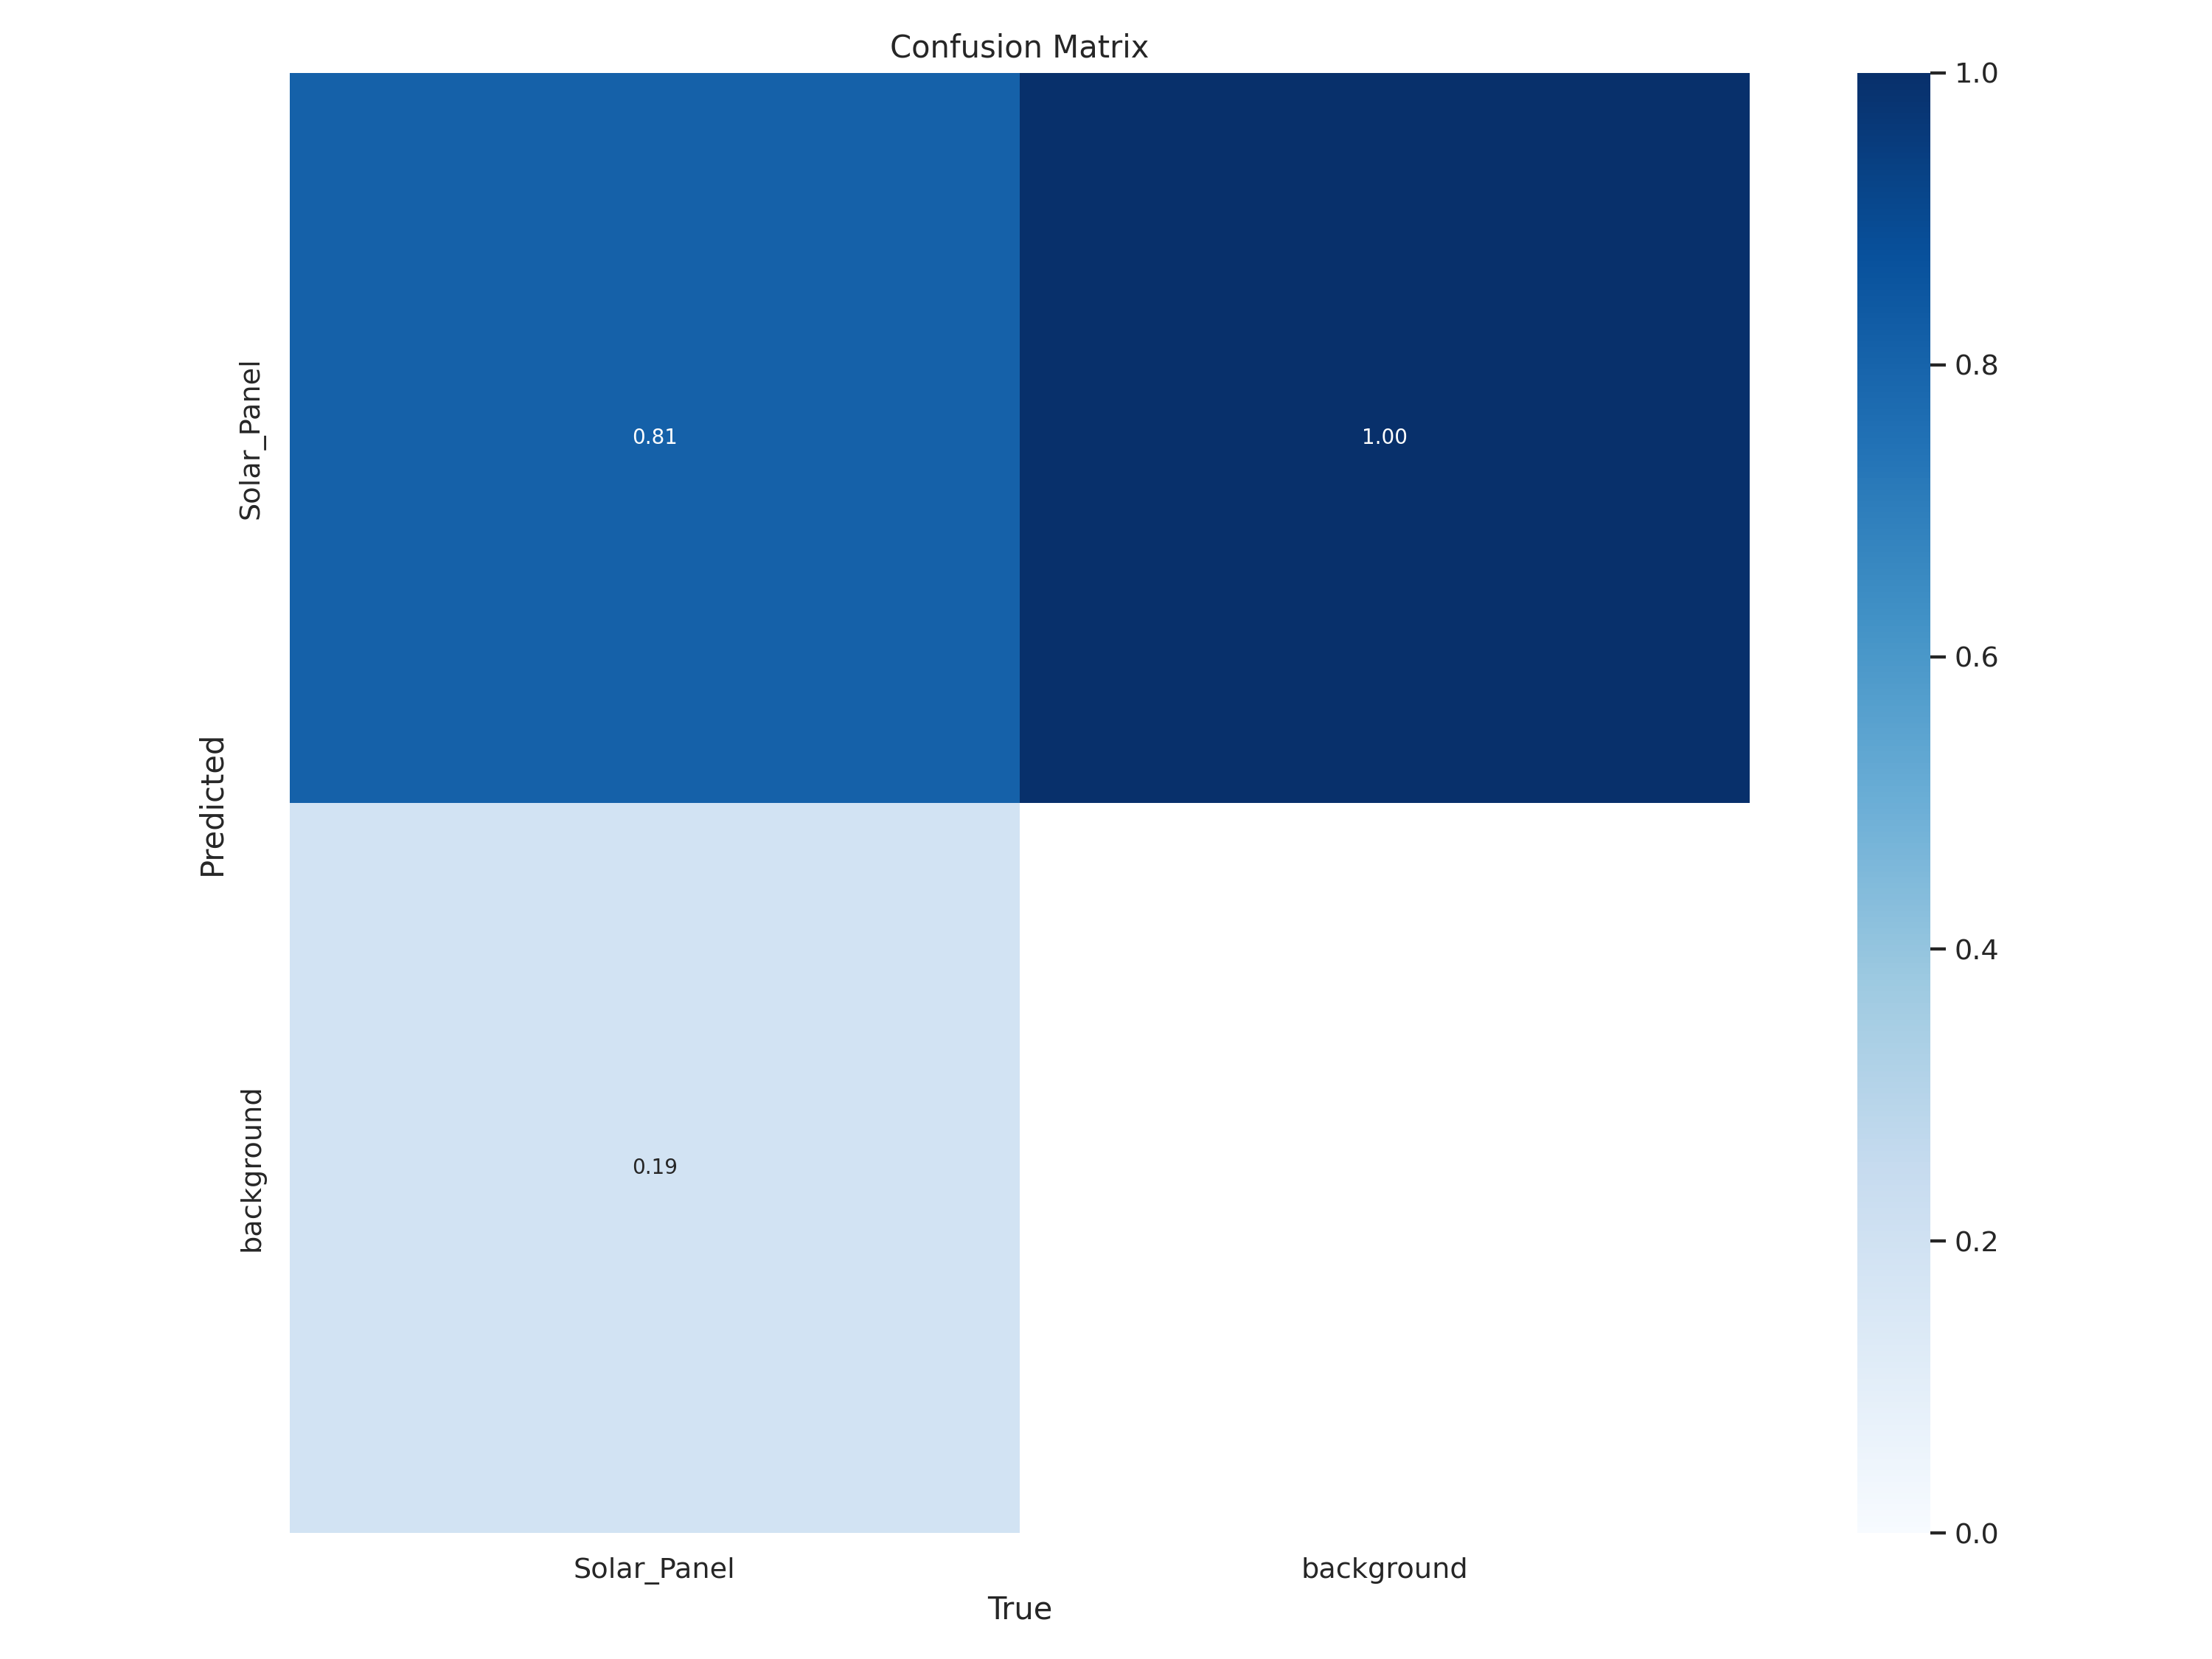

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content/drive/.shortcut-targets-by-id/1g8Ok-hMB7VP0Esfg6eLezuinaVb9-pFS/yolov8train


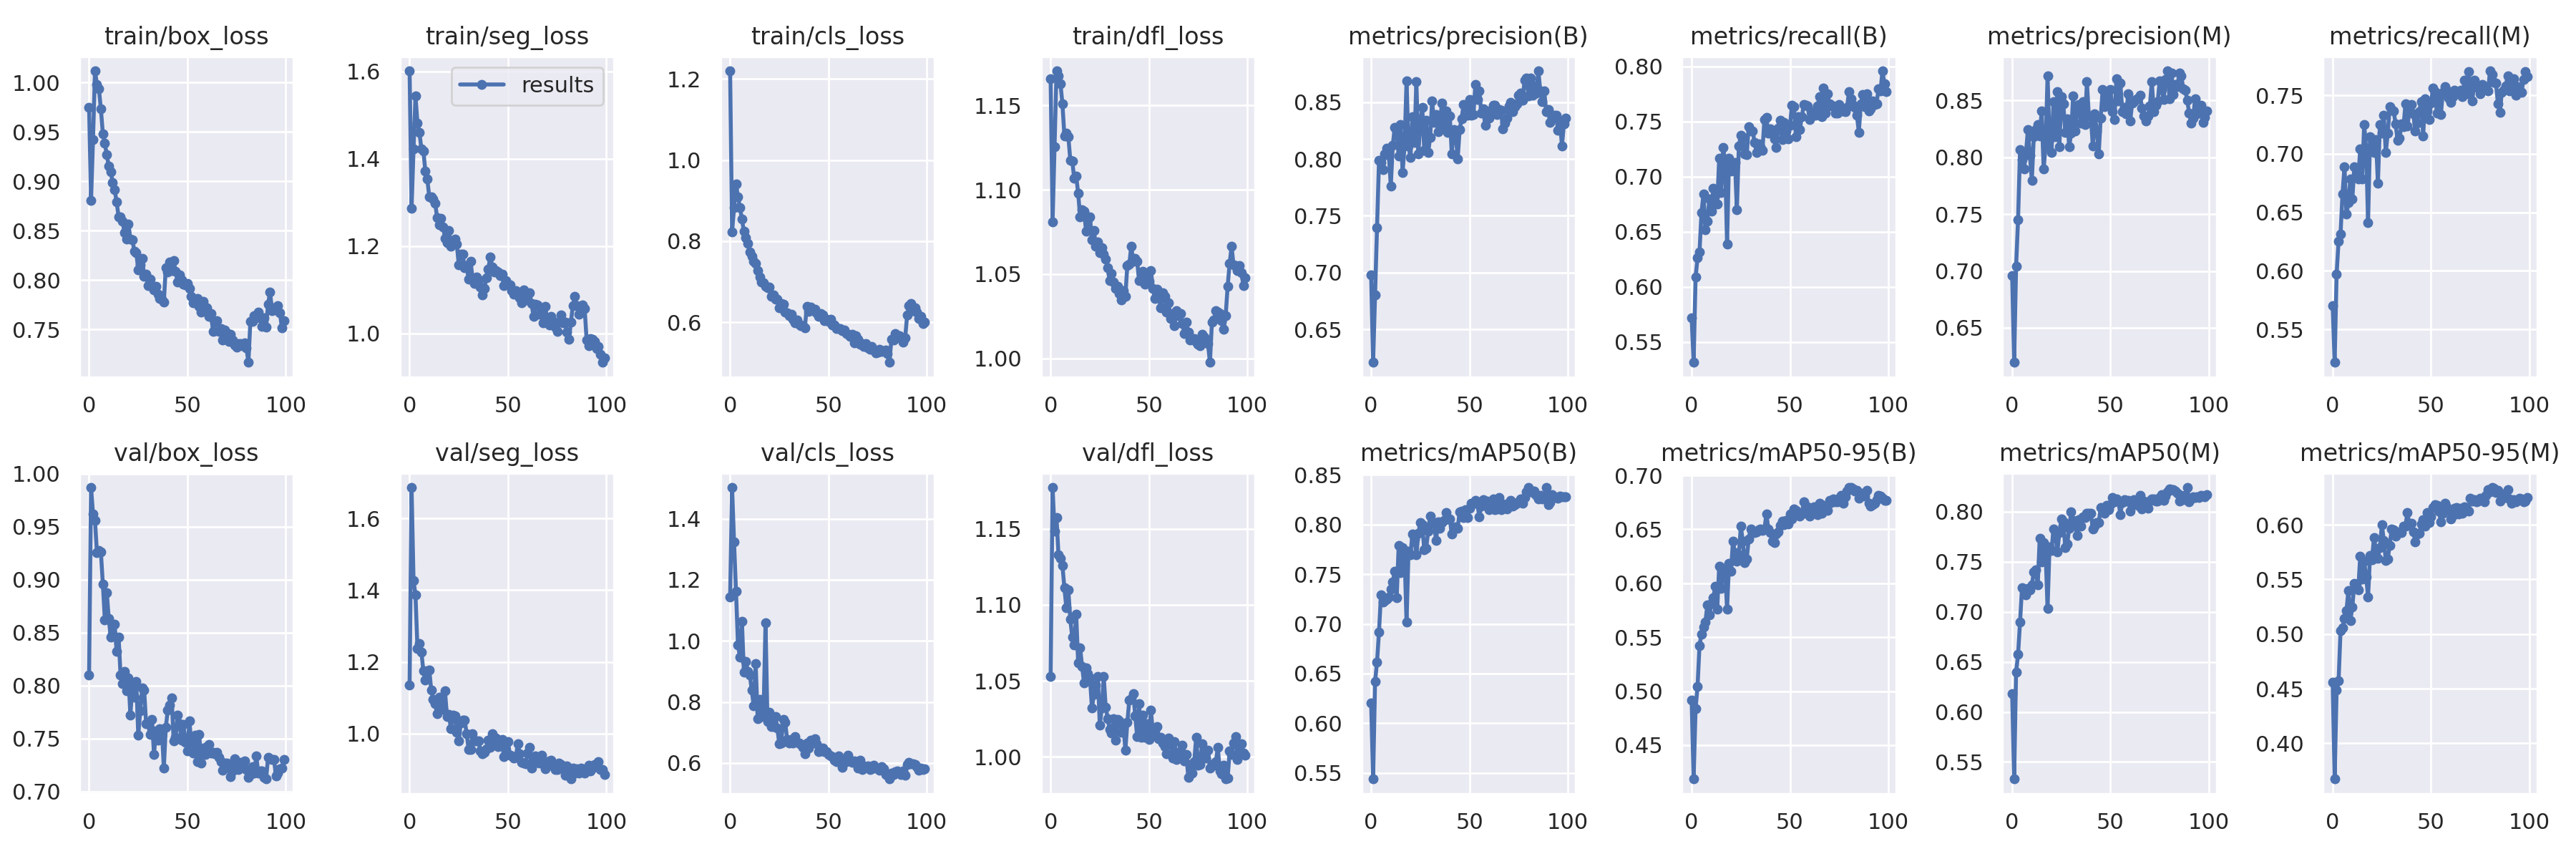

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=800)

/content/drive/.shortcut-targets-by-id/1g8Ok-hMB7VP0Esfg6eLezuinaVb9-pFS/yolov8train


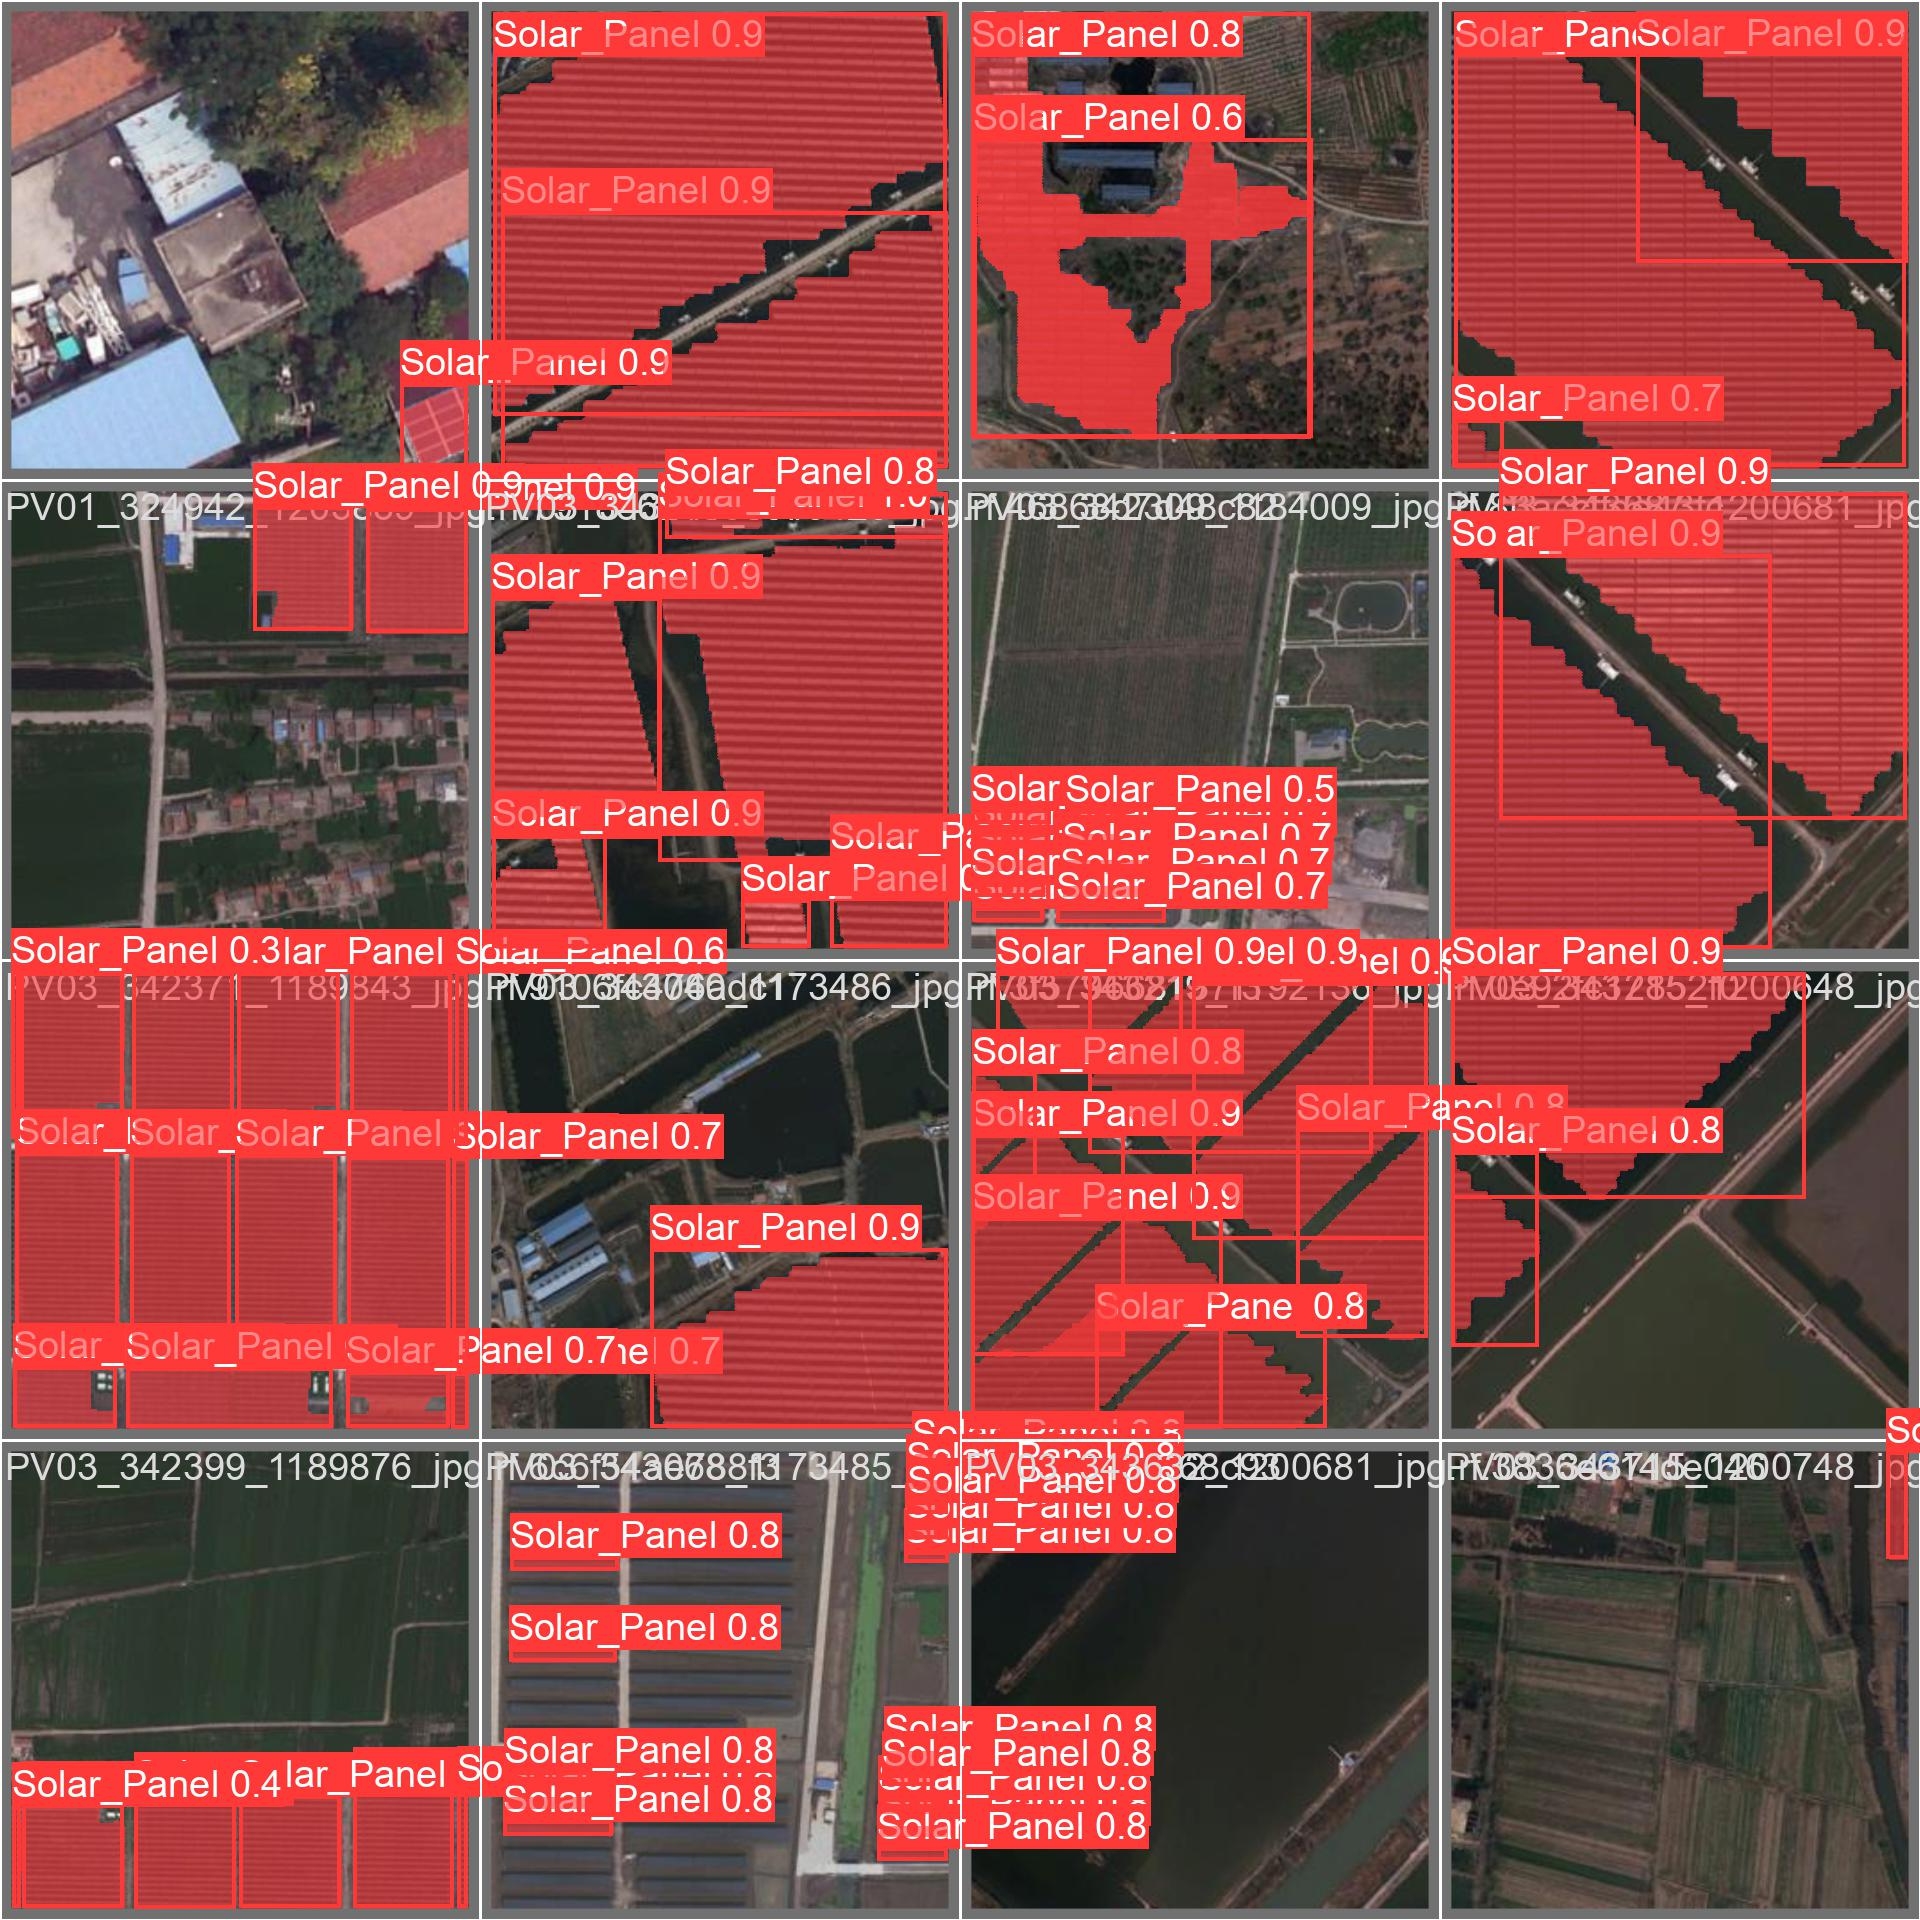

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=800)

## Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content/drive/.shortcut-targets-by-id/1g8Ok-hMB7VP0Esfg6eLezuinaVb9-pFS/yolov8train
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/solar_panels-1/valid/labels.cache... 661 images, 37 backgrounds, 0 corrupt: 100% 661/661 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 42/42 [00:44<00:00,  1.07s/it]
                   all        661       2710      0.873       0.77      0.834       0.69      0.875      0.768      0.822       0.63
Speed: 1.0ms pre-process, 48.1ms inference, 0.0ms loss, 1.9ms post-process per image
